In [320]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import functools

In [321]:
# (vg2, ip)
data = []
with open('data.txt', 'r') as f:
    for l in f:
        (x, y) = l.split(' ')
        data.append((round(float(x), 2), round(float(y), 2)))

In [452]:
VG2 = [10*t[0] for t in data]
Ip = [t[1] for t in data]

def vertex(p):
    b = p[1]
    a = p[0]
    return - b / (2 * a)

def show_poly(p):
    [a, b, c] = [round(p_n, 2) for p_n in p]
    return "I_{{p}} = {a:3.2f}{{V_{{G2}}}}^2 {b:+3.2f}V_{{G2}} {c:+3.2f}".format(a=a, b=b, c=c)

def find_local(f, x, y, deg):
    locs = []
    for i in range(deg, len(x) - deg):
        x0 = x[i]
        y0 = y[i]
        if f(y[i-deg:i+deg+1]) == y0:
            locs.append(x0)
    return locs

def find_in(x, v):
    epsilon = -1
    j = -1
    for (i, x0) in enumerate(x):
        if j == -1:
            j = i
            epsilon = abs(x0-v)
        else:
            new_e = abs(x0-v)
            if new_e < epsilon:
                epsilon = new_e
                j = i
    return j

def avg(l):
    return sum(l)/len(l)

def window_around(x, y, v, deg):
    i = find_in(x,v)
    return (x[i - deg:i+deg+1], y[i-deg:i+deg+1])

def fit(x, y):
    return np.polyfit(x, y, 2)

find_local_minima = functools.partial(find_local, min)
find_local_maxima = functools.partial(find_local, max)

In [398]:
find_local_minima(VG2, Ip, 3)

[5.1, 7.6, 22.5, 33.6, 45.300000000000004]

In [399]:
find_local_maxima(VG2, Ip, 3)

[3.3000000000000003,
 4.1,
 5.8,
 16.200000000000003,
 17.3,
 27.3,
 28.2,
 29.3,
 38.3,
 39.300000000000004,
 40.300000000000004,
 41.3]

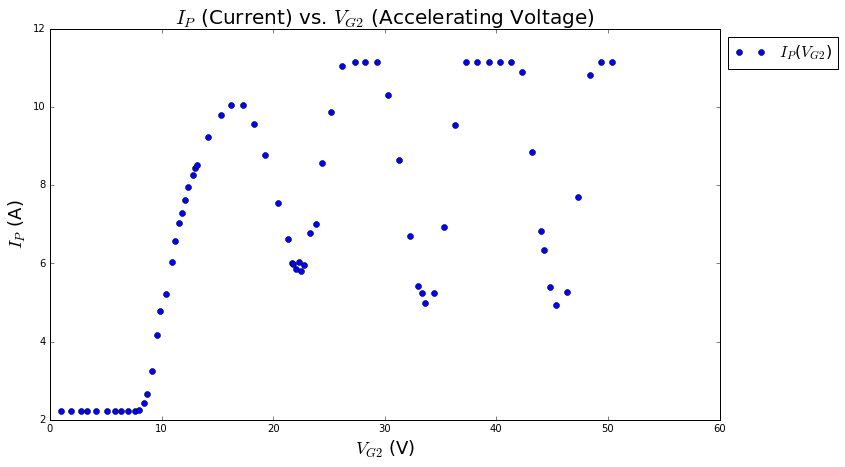

In [464]:
plt.figure(figsize=(12,7))
plt.plot(VG2, Ip, 'bo', label="$I_P$($V_{G2}$)")
plt.title("$I_P$ (Current) vs. $V_{G2}$ (Accelerating Voltage)", fontsize=20)
plt.ylabel("$I_P$ (A)",fontsize=18)
plt.xlabel("$V_{G2}$ (V)", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=16)
plt.show()

In [401]:
min_windows = [window_around(VG2,Ip, m, 2) for m in [22.5, 33.6, 45.3]]
min_windows

[([22.0, 22.3, 22.5, 22.799999999999997, 23.3], [5.85, 6.05, 5.8, 5.97, 6.78]),
 ([33.0, 33.3, 33.6, 34.4, 35.3], [5.42, 5.24, 4.98, 5.24, 6.94]),
 ([44.3, 44.800000000000004, 45.300000000000004, 46.3, 47.300000000000004],
  [6.34, 5.41, 4.93, 5.26, 7.71])]

In [402]:
max_windows = [window_around(VG2, Ip, m, 3) for m in [16.2, 28.2, 39.3]]
max_windows

[([13.200000000000001, 14.2, 15.3, 16.200000000000003, 17.3, 18.3, 19.3],
  [8.53, 9.25, 9.81, 10.05, 10.05, 9.56, 8.77]),
 ([25.2,
   26.200000000000003,
   27.3,
   28.2,
   29.3,
   30.299999999999997,
   31.299999999999997],
  [9.88, 11.06, 11.15, 11.15, 11.15, 10.31, 8.66]),
 ([36.3,
   37.3,
   38.3,
   39.300000000000004,
   40.300000000000004,
   41.3,
   42.300000000000004],
  [9.55, 11.15, 11.16, 11.16, 11.16, 11.16, 10.89])]

In [403]:
polys = [fit(x, y) for (x, y) in min_windows + max_windows]
polys

[array([   0.94343826,  -42.11266828,  475.78959322]),
 array([  8.57252855e-01,  -5.79207964e+01,   9.83316493e+02]),
 array([  9.63496802e-01,  -8.78171173e+01,   2.00581618e+03]),
 array([ -0.15244191,   5.01090064, -31.10999158]),
 array([  -0.21553095,   11.99812217, -155.56505207]),
 array([ -1.11904762e-01,   8.94000000e+00,  -1.67168595e+02])]

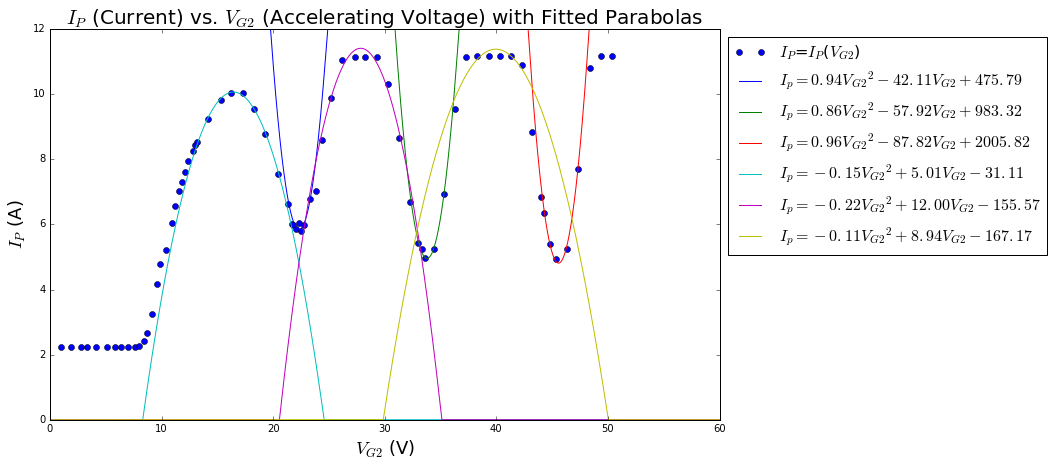

In [463]:
r = np.arange(0, 60, 0.01)
plt.figure(figsize=(12,7))
poly_vals = [(p, r, np.clip(np.polyval(p, r), 0, 12)) for p in polys]
plt.plot(VG2, Ip, 'bo', label="$I_P$=$I_P$($V_{G2}$)")
for (p, d, r) in poly_vals:
    plt.plot(d, r, label="${}$".format(show_poly(p)))
plt.title("$I_P$ (Current) vs. $V_{G2}$ (Accelerating Voltage) with Fitted Parabolas", fontsize=20)
plt.ylabel("$I_P$ (A)",fontsize=18)
plt.xlabel("$V_{G2}$ (V)", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=16)
plt.show()

In [455]:
def find_energies(seq):
    v = []
    for i in range(1, len(seq)):
        v.append(seq[i] - seq[i-1])
    return v

min_polys = [vertex(fit(x, y)) for (x,y) in min_windows]
max_polys = [vertex(fit(x, y)) for (x, y) in max_windows]

(max_polys,min_polys)

([16.435442557000162, 27.833873549217031, 39.9446808510639],
 [22.318719843958181, 33.782795875595731, 45.57208550942692])

In [456]:
energy_values = np.array(find_energies(min_polys) + find_energies(max_polys))
energy_values

array([ 11.46407603,  11.78928963,  11.39843099,  12.1108073 ])

In [457]:
std_dev = np.std(energy_values)
uncertainty = std_dev / len(energy_values)
energy = np.average(energy_values)
(energy, std_dev, uncertainty)

(11.690650989883119, 0.28416089073926848, 0.07104022268481712)

In [474]:
theoretical_energy = 11.55
the_uncertainty = 0.01
discrepancy = (energy - theoretical_energy) / theoretical_energy
'{}%'.format(discrepancy * 100)

'1.2177574881655284%'

## Final value

11.69 +- 0.07 V, discrepancy = 1.22%

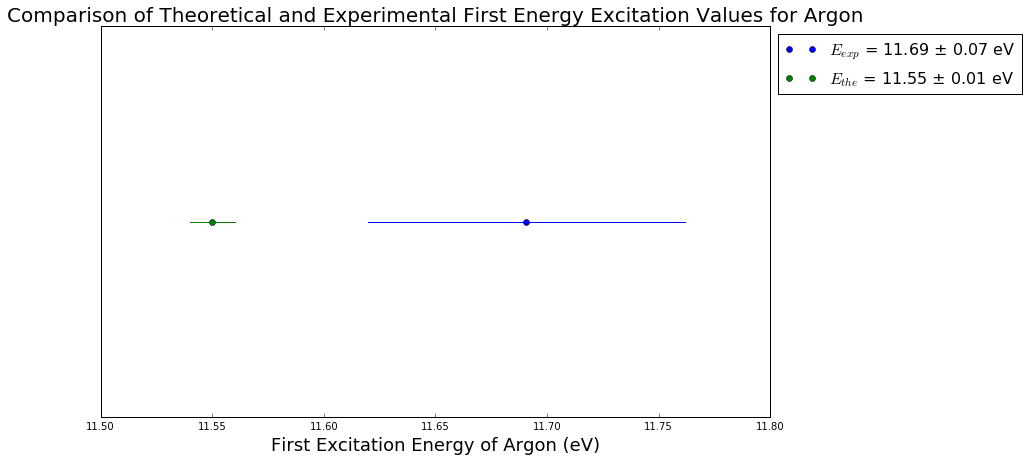

In [480]:
ar = np.array([energy-uncertainty, energy+uncertainty])
plt.figure(figsize=(12,7))
plt.plot(ar, np.zeros_like(ar), 'b')
plt.plot([energy], [0], 'bo', 
         label="$E_{{exp}}$ = {0:3.2f} ± {1:3.2f} eV".format(energy, uncertainty))
ar2 = np.array([theoretical_energy-the_uncertainty,theoretical_energy+the_uncertainty])
plt.plot(ar2, np.zeros_like(ar), 'g')
plt.plot(
    [theoretical_energy], 
    [0], 
    'go', 
    label="$E_{{the}}$ = {0:3.2f} ± {1:3.2f} eV".format(theoretical_energy, the_uncertainty))
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Comparison of Theoretical and Experimental First Energy Excitation Values for Argon",fontsize=20)
plt.xlabel("First Excitation Energy of Argon (eV)",fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=16)
plt.show()